In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
font = cv2.FONT_HERSHEY_SIMPLEX

capture = cv2.VideoCapture('../../Data/traffic/1k_traffic.webm')

if capture.isOpened():
    print('video opened ok')
else:
    print('video not opened')
    
avg_frame = 'rolling average'
acc_frame = 'average from start'

cv2.namedWindow(avg_frame,cv2.WINDOW_NORMAL)

cv2.resizeWindow(avg_frame, (800,500))

cv2.namedWindow(acc_frame,cv2.WINDOW_NORMAL)

cv2.resizeWindow(acc_frame, (800,500))

img_count = 0

while capture.isOpened():
    ret, img = capture.read()
    if img is None:
        break
    if ret:
        img_count += 1
        if img_count == 1:
            avg = np.float32(img)
            acc = np.float32(img)
        else:
            cv2.accumulateWeighted(img, avg, 0.05)
            cv2.accumulate(img,acc)
            
        avg_img = cv2.convertScaleAbs(avg)
        acc_img = cv2.convertScaleAbs(acc)
        
        cv2.convertScaleAbs(acc, acc_img, 1/img_count)
        
        display_img = avg_img.copy()
        
        cv2.putText(display_img,str(img_count),(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
        cv2.imshow(avg_frame,display_img)
        cv2.imshow(acc_frame,acc_img)
    else:
        break
    # Key 'q' to quit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    # Key 'p' to pause
    if cv2.waitKey(100) & 0xFF == ord('p'):
        input('Hit <return> to continue')

capture.release()
cv2.destroyAllWindows()

print( 'frames {0}'.format(img_count)) 

video opened ok
frames 249


In [3]:
capture.release()
cv2.destroyAllWindows()

In [4]:
# cv2.imshow('Foo',frame)

In [5]:
cv2.__version__

'3.4.3'

In [18]:
src1 = cv2.imread('traffic1.png', 1)

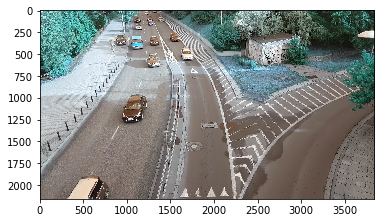

In [6]:
plt.imshow(img)

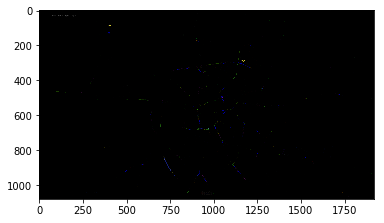

In [20]:
src2 = cv2.imread('traffic2.png', 1)

diff = cv2.subtract(src1, src2)

plt.imshow(diff)

In [21]:
cv2.imwrite('traffic_diff_5_mins.png', diff)

True